In [37]:
!pip install psycopg2-binary sqlalchemy pandas

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.6 MB 1.3 MB/s eta 0:00:02
   ------------ --------------------------- 0.8/2.6 MB 1.7 MB/s eta 0:00:02
   ---------------- ----------------------- 1.0/2.6 MB 1.4 MB/s eta 0:00:02
   ------------------------ --------------- 1.6/2.6 MB 1.7 MB/s eta 0:00:01
   -------------------------------- ------- 2.1/2.6 MB 1.8 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB

In [38]:
import pandas as pd
import matplotlib.pyplot as plt #visualisasi data
import numpy as np #proses nilai numerik
import seaborn as sns #visualisasi data
import scipy.stats as stats
from sqlalchemy import create_engine

In [45]:
# Format connection string
username = "postgres"
password = "Fajrimughni9"
host = "localhost"
port = "5432"
database = "Finpro Master DS29"

# Buat engine SQLAlchemy
engine = create_engine(f"postgresql://{username}:{password}@{host}:{port}/{database}")

In [3]:
df_zomato = pd.read_csv("zomato.csv", encoding='latin-1')

In [4]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Data Cleaning

In [5]:
# Cek jumlah data yang kosong di setiap kolom
df_zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
# Hitung jumlah total baris
total_rows = len(df_zomato)

# Hitung persentase missing values per kolom
missing_percentage = (df_zomato.isnull().sum() / total_rows) * 100

# Menampilkan hasil dalam bentuk dataframe agar lebih rapi
missing_df = pd.DataFrame({'column': df_zomato.columns, 'missing_percentage': missing_percentage})

# Menampilkan hanya kolom dengan missing values
missing_df[missing_df['missing_percentage'] > 0].sort_values(by='missing_percentage', ascending=False)

,column,missing_percentage
Cuisines,Cuisines,0.094231


In [7]:
len(df_zomato.drop_duplicates()) / len(df_zomato)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

## Data Cleaning Review

- Mengatur missing valu dalam statistik ketentuannya ialah jika diatas 20% maka kita drop kolomnya
- Jika <= 20% maka di handling karena alasan distribusi data.

`Aturan missing value handling :`
1. jika tipe datanya itu **numerik** -> handling menggunakan **median** (robust / tahan terhadap outlier)
2. jika tipe datanya itu **kategorik / object / string** -> handling menggunakan **mode / modus**

In [8]:
for column in df_zomato.columns:
    print(f"============= {column} =================")
    display(df_zomato[column].value_counts())
    print()

============= Restaurant ID =================


Restaurant ID
5927402     1
6317637     1
6304287     1
6300002     1
6318506     1
           ..
6308205     1
18255654    1
6318213     1
18182702    1
18185059    1
Name: count, Length: 9551, dtype: int64


============= Restaurant Name =================


Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
NamlÛ± Gurme                 1
Ceviz AÛôacÛ±                1
Huqqa                        1
Aôôk Kahve                 1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64


============= Country Code =================


Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64


============= City =================


City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lakes Entrance       1
Mohali               1
Panchkula            1
Bandung              1
Randburg             1
Name: count, Length: 141, dtype: int64


============= Address =================


Address
Sector 41, Noida                                                                      11
Dilli Haat, INA, New Delhi                                                            11
Greater Kailash (GK) 1, New Delhi                                                     10
The Imperial, Janpath, New Delhi                                                       9
Cyber Hub, DLF Cyber City, Gurgaon                                                     8
                                                                                      ..
Kí_í_í_k Esat Mahallesi, Esat Caddesi, No 110/25, íankaya, Ankara                     1
Mahallesi, Selanik 2 Caddesi, No 61/A, íankaya, Ankara                                1
Kocatepe Mahallesi, Mithatpaôa Caddesi, No 62/A, íankaya, Ankara                     1
Macun Mahallesi, Erciyes ÛÁôyerleri Sitesi, 201. Cadde, No 6, Yenimahalle, Ankara     1
Maltepe Mahallesi, Gení_lik Caddesi, No 28, íankaya, Ankara                           1
Name: count, 


============= Locality =================


Locality
Connaught Place              122
Rajouri Garden                99
Shahdara                      87
Defence Colony                86
Malviya Nagar                 85
                            ... 
Barra da Tijuca                1
Centro                         1
Galeria River, Copacabana      1
Gíçvea                         1
Lagoa                          1
Name: count, Length: 1208, dtype: int64


============= Locality Verbose =================


Locality Verbose
Connaught Place, New Delhi                                 122
Rajouri Garden, New Delhi                                   99
Shahdara, New Delhi                                         87
Defence Colony, New Delhi                                   86
Pitampura, New Delhi                                        85
                                                          ... 
Addition Hills, San Juan City                                1
UP Town Center, Diliman, Quezon City, Quezon City            1
Sofitel Philippine Plaza Manila, Pasay City, Pasay City      1
Rajguru Nagar, Ludhiana                                      1
Galeria River, Copacabana, Rio de Janeiro                    1
Name: count, Length: 1265, dtype: int64


============= Longitude =================


Longitude
0.000000      498
77.353663      19
77.230412      12
77.088688      10
77.251426       9
             ... 
28.977392       1
29.041297       1
29.034640       1
29.036019       1
121.056475      1
Name: count, Length: 8120, dtype: int64


============= Latitude =================


Latitude
0.000000     498
28.574309     16
28.551456      9
28.574300      9
28.597103      8
            ... 
39.906569      1
39.916686      1
39.919144      1
39.946278      1
14.545858      1
Name: count, Length: 8677, dtype: int64


============= Cuisines =================


Cuisines
North Indian                          936
North Indian, Chinese                 511
Chinese                               354
Fast Food                             354
North Indian, Mughlai                 334
                                     ... 
World Cuisine, Patisserie, Cafe         1
Burger, Izgara                          1
Desserts, Bí_rek                        1
Restaurant Cafe, Turkish, Desserts      1
Restaurant Cafe, Desserts               1
Name: count, Length: 1825, dtype: int64


============= Average Cost for two =================


Average Cost for two
500     900
300     897
400     857
200     687
600     652
       ... 
955       1
390       1
410       1
3210      1
545       1
Name: count, Length: 140, dtype: int64


============= Currency =================


Currency
Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Rand(R)                     60
Emirati Diram(AED)          60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: count, dtype: int64


============= Has Table booking =================


Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64


============= Has Online delivery =================


Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64


============= Is delivering now =================


Is delivering now
No     9517
Yes      34
Name: count, dtype: int64


============= Switch to order menu =================


Switch to order menu
No    9551
Name: count, dtype: int64


============= Price range =================


Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


============= Aggregate rating =================


Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


============= Rating color =================


Rating color
Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: count, dtype: int64


============= Rating text =================


Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64


============= Votes =================


Votes
0      1094
1       483
2       327
3       244
4       207
       ... 
441       1
466       1
745       1
964       1
473       1
Name: count, Length: 1012, dtype: int64

## Outlier Handling

In [9]:
# Memilih semua kolom numerik dalam DataFrame
numeric_columns = df_zomato.select_dtypes(include=['number'])

# Menampilkan kolom-kolom numerik
print("Kolom numerik:")
print(numeric_columns.columns)

Kolom numerik:
Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')


In [10]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

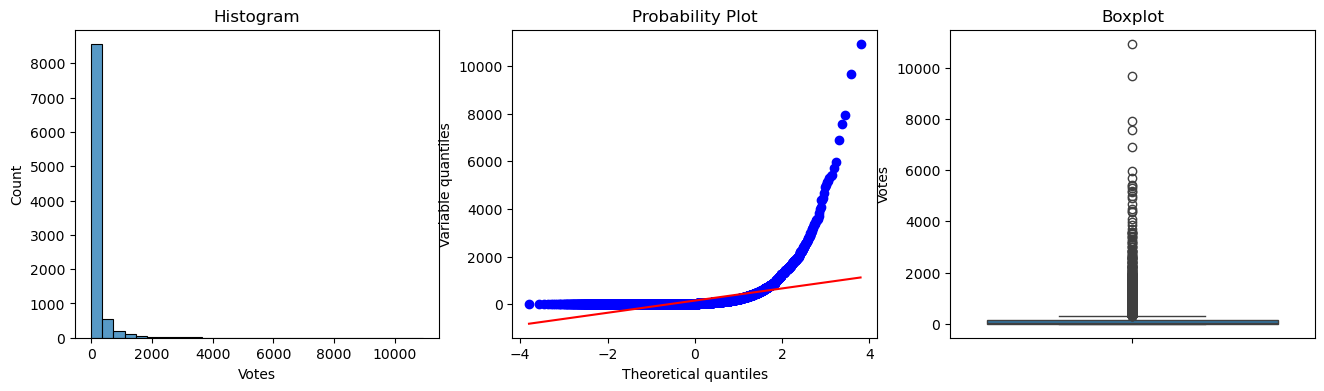

In [11]:
check_plot(df_zomato, 'Votes') 

In [12]:
def find_outlier_boundary(df, variable):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

occup_upper_limit, occup_lower_limit = find_outlier_boundary(df_zomato, 'Votes')
occup_upper_limit, occup_lower_limit

(np.float64(320.0), np.float64(-184.0))

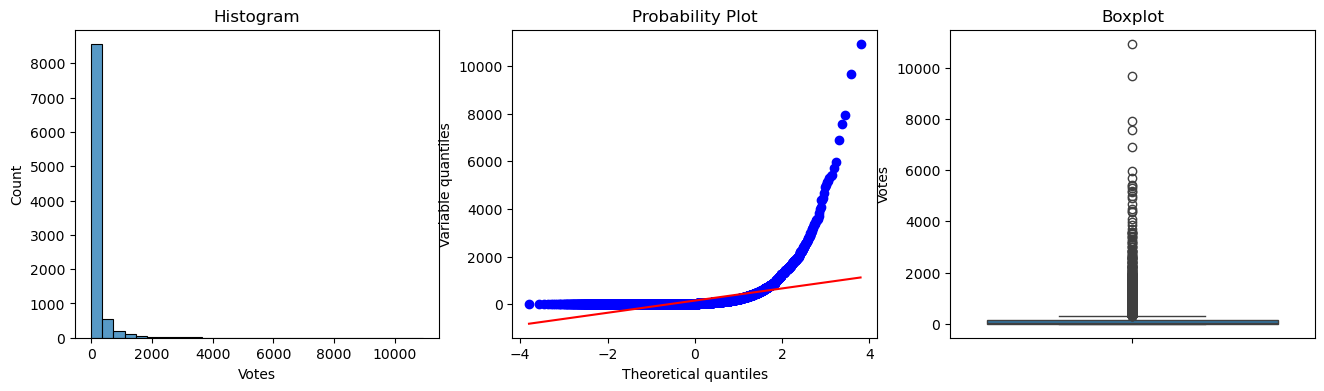

In [13]:
df_cleaned = df_zomato[(df_zomato['Votes'] <= occup_upper_limit) & (df_zomato['Votes'] >= occup_lower_limit)]
check_plot(df_zomato, 'Votes') 

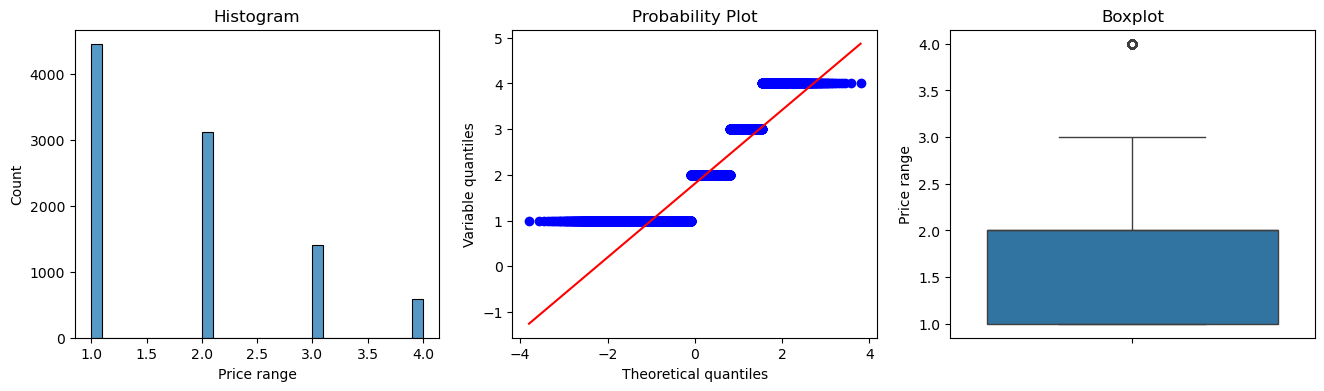

In [14]:
check_plot(df_zomato, 'Price range') 

## Encoding setelah validasi data

In [15]:
# Mengganti "Yes" menjadi 1 dan "No" menjadi 0 dalam kolom "online_order" dan kolom "book_table"
df_cleaned['Has Online delivery'] = df_cleaned['Has Online delivery'].replace({'Yes': 1, 'No': 0})
df_cleaned['Is delivering now'] = df_cleaned['Is delivering now'].replace({'Yes': 1, 'No': 0})
df_cleaned['Has Table booking'] = df_cleaned['Has Table booking'].replace({'Yes': 1, 'No': 0})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8944\4079073648.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['Has Online delivery'] = df_cleaned['Has Online delivery'].replace({'Yes': 1, 'No': 0})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8944\4079073648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Has Online delivery'] = df_cleaned['Has Online delivery'].replace({'Yes': 1, 'No': 0})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8944\4079073648.py:3: FutureWarning: Downcasting behavior in 

## EDA

In [16]:
df_zomato.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


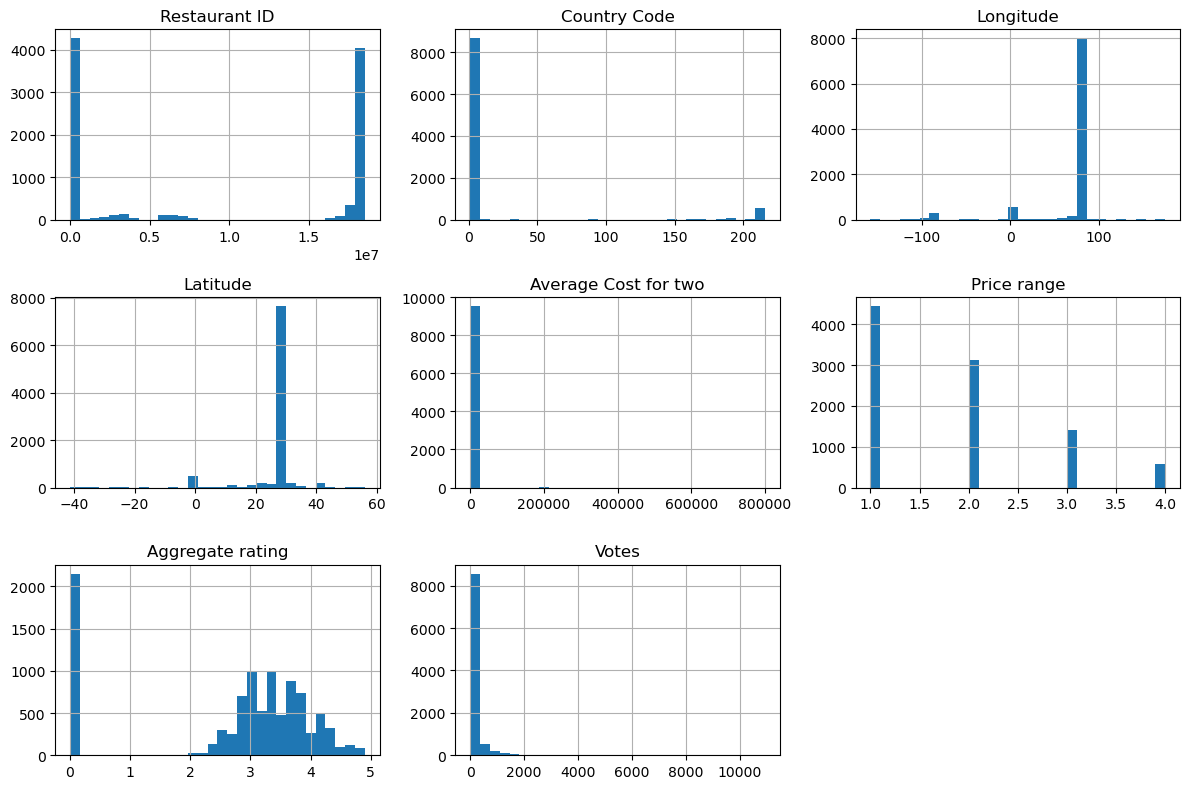

In [17]:
df_zomato.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

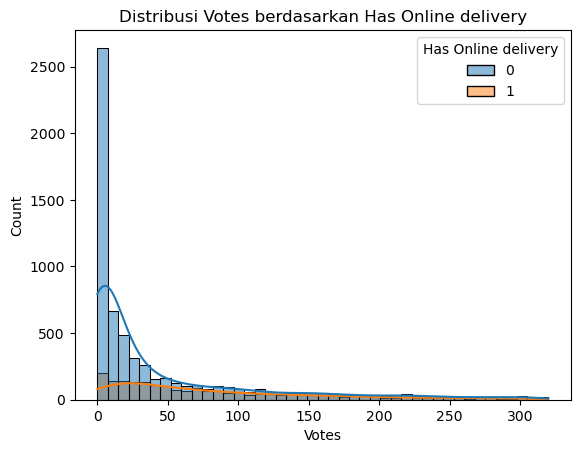

In [18]:
sns.histplot(df_cleaned, x='Votes', hue='Has Online delivery', kde=True)
plt.title("Distribusi Votes berdasarkan Has Online delivery")
plt.show()

In [19]:
categorical_columns = df_zomato.select_dtypes(include=['object', 'category']).columns

In [20]:
df_zomato[categorical_columns].describe()

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Sector 41, Noida",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


In [21]:
df_cleaned["Cuisines"].describe()

count             8418
unique            1423
top       North Indian
freq               912
Name: Cuisines, dtype: object

In [22]:
# 1. Seleksi data dengan Country Code 94
df_indonesia = df_zomato[df_zomato['Country Code'] == 94]

# 2. Simpan ke CSV baru
df_indonesia.to_csv('zomato_indonesia.csv', index=False)

In [23]:
df_indonesia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 9276 to 9296
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         21 non-null     int64  
 1   Restaurant Name       21 non-null     object 
 2   Country Code          21 non-null     int64  
 3   City                  21 non-null     object 
 4   Address               21 non-null     object 
 5   Locality              21 non-null     object 
 6   Locality Verbose      21 non-null     object 
 7   Longitude             21 non-null     float64
 8   Latitude              21 non-null     float64
 9   Cuisines              21 non-null     object 
 10  Average Cost for two  21 non-null     int64  
 11  Currency              21 non-null     object 
 12  Has Table booking     21 non-null     object 
 13  Has Online delivery   21 non-null     object 
 14  Is delivering now     21 non-null     object 
 15  Switch to order menu  21 

In [24]:
df_indonesia.sample(21)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9282,7422751,Union Deli,94,Jakarta,"Grand Indonesia Mall, Lantai Ground, East Mall...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.819749,-6.197150,"Desserts, Bakery, Western",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.6,Dark Green,Excellent,903
9296,7417450,Talaga Sampireun,94,Tangerang,"Jl. Boulevard Bintaro Jaya Blok B7/N1, Bintaro...",Pondok Aren,"Pondok Aren, Tangerang",106.726119,-6.269914,"Sunda, Indonesian",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.9,Dark Green,Excellent,2212
9283,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.1,Green,Very Good,1498
9288,18352452,Lucky Cat Coffee & Kitchen,94,Jakarta,"Plaza Festival, South Parking, Jl. HR Rasuna S...","Plaza Festival, Kuningan","Plaza Festival, Kuningan, Jakarta",106.831748,-6.218932,"Cafe, Western",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.3,Green,Very Good,458
9277,7423620,Momo Milk,94,Bogor,"Jl. Kantor Pos No. 6, Bogor Timur, Bogor",Bogor Timur,"Bogor Timur, Bogor",106.810301,-6.606917,"Cafe, Desserts, Beverages",...,Indonesian Rupiah(IDR),No,No,No,No,2,3.7,Yellow,Good,783
9294,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.3,Green,Very Good,243
9292,18409146,Fish Streat,94,Jakarta,"Jl. Tanjung Duren Utara III, Blok M Kav. 32, T...",Tanjung Duren,"Tanjung Duren, Jakarta",0.000000,0.000000,"Seafood, Western",...,Indonesian Rupiah(IDR),No,No,No,No,3,3.4,Orange,Average,152
9276,18400530,Noah's Barn Coffeenery,94,Bandung,"Jl. Dayang Sumbi No. 2, Dago, Bandung",Dago,"Dago, Bandung",107.612790,-6.887058,"Cafe, Coffee and Tea, Western",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.2,Green,Very Good,22
9278,7423482,Lemongrass,94,Bogor,"Jl. Raya Pajajaran No. 21, Bogor Utara, Bogor",Bogor Utara,"Bogor Utara, Bogor",106.807850,-6.576578,"Peranakan, Indonesian",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.0,Green,Very Good,1159
9287,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.9,Dark Green,Excellent,605


In [25]:
# Filter makanan dari restoran dengan rating dan vote tinggi
top_foods = df_indonesia.sort_values(by=['Votes', 'Aggregate rating'], ascending=False)

# Hitung frekuensi kemunculan jenis makanan
top_cuisines = df_indonesia['Cuisines'].value_counts()


In [26]:
top_cuisines

Cuisines
Sunda, Indonesian                                     3
Seafood, Western                                      2
Cafe, Desserts, Beverages                             1
Cafe, Coffee and Tea, Western                         1
Cafe, Italian, Coffee and Tea, Western, Indonesian    1
Peranakan, Indonesian                                 1
Desserts, Bakery, Western                             1
Italian, Continental                                  1
Asian, Indonesian, Western                            1
Korean                                                1
Western, Asian, Cafe                                  1
Japanese, Sushi, Ramen                                1
Cafe, Western                                         1
Sushi, Japanese                                       1
Japanese                                              1
Burger                                                1
French, Western                                       1
Indonesian                             

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8944\1366389547.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")


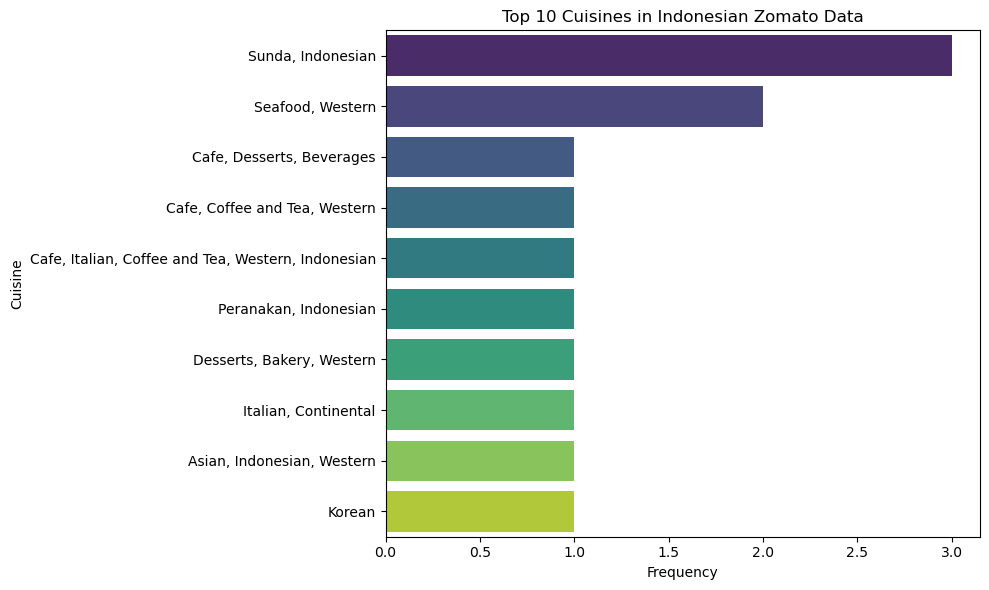

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung frekuensi setiap jenis makanan
top_cuisines = df_indonesia['Cuisines'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")
plt.title("Top 10 Cuisines in Indonesian Zomato Data")
plt.xlabel("Frequency")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()

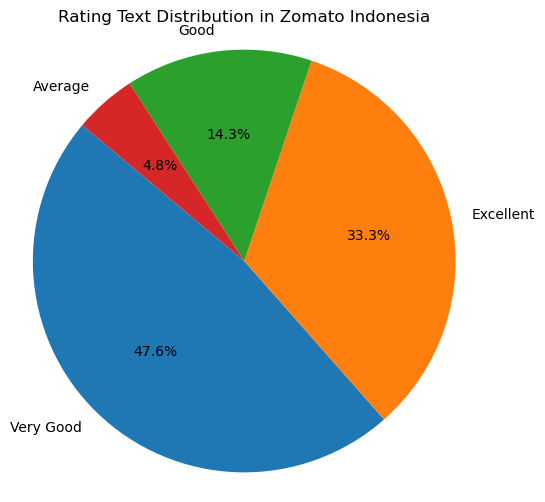

In [28]:
rating_counts = df_indonesia['Rating text'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Rating Text Distribution in Zomato Indonesia")
plt.axis('equal')
plt.show()


In [29]:
df_indonesia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 9276 to 9296
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         21 non-null     int64  
 1   Restaurant Name       21 non-null     object 
 2   Country Code          21 non-null     int64  
 3   City                  21 non-null     object 
 4   Address               21 non-null     object 
 5   Locality              21 non-null     object 
 6   Locality Verbose      21 non-null     object 
 7   Longitude             21 non-null     float64
 8   Latitude              21 non-null     float64
 9   Cuisines              21 non-null     object 
 10  Average Cost for two  21 non-null     int64  
 11  Currency              21 non-null     object 
 12  Has Table booking     21 non-null     object 
 13  Has Online delivery   21 non-null     object 
 14  Is delivering now     21 non-null     object 
 15  Switch to order menu  21 

In [30]:
df_indonesia_selected = df_indonesia[[
    'Restaurant ID',
    'Restaurant Name',
    'City',
    'Cuisines',
    'Average Cost for two',
    'Aggregate rating',
    'Votes',
    'Country Code'
]].rename(columns={
    'Restaurant ID': 'restaurant_id',
    'Restaurant Name': 'restaurant_name',
    'City': 'city',
    'Cuisines': 'cuisines',
    'Average Cost for two': 'average_cost_for_two',
    'Aggregate rating': 'aggregate_rating',
    'Votes': 'votes',
    'Country Code': 'country_code'
})

# Pastikan tipe data sesuai
df_indonesia_selected = df_indonesia_selected.astype({
    'restaurant_id': 'int',
    'restaurant_name': 'string',
    'city': 'string',
    'cuisines': 'string',
    'average_cost_for_two': 'int',
    'aggregate_rating': 'float',
    'votes': 'int',
    'country_code': 'int'
})


In [31]:
df_indonesia_selected

,restaurant_id,restaurant_name,city,cuisines,average_cost_for_two,aggregate_rating,votes,country_code
9276,18400530,Noah's Barn Coffeenery,Bandung,"Cafe, Coffee and Tea, Western",150000,4.2,22,94
9277,7423620,Momo Milk,Bogor,"Cafe, Desserts, Beverages",70000,3.7,783,94
9278,7423482,Lemongrass,Bogor,"Peranakan, Indonesian",250000,4.0,1159,94
9279,7422633,Talaga Sampireun,Jakarta,"Sunda, Indonesian",200000,4.9,1662,94
9280,7405789,Toodz House,Jakarta,"Cafe, Italian, Coffee and Tea, Western, Indone...",165000,4.6,1476,94
9281,18425821,OJJU,Jakarta,Korean,200000,3.9,137,94
9282,7422751,Union Deli,Jakarta,"Desserts, Bakery, Western",200000,4.6,903,94
9283,7402935,Skye,Jakarta,"Italian, Continental",800000,4.1,1498,94
9284,7410290,Satoo - Hotel Shangri-La,Jakarta,"Asian, Indonesian, Western",800000,4.6,873,94
9285,18391256,MONKS,Jakarta,"Western, Asian, Cafe",250000,4.2,259,94


In [32]:
df_indonesia_selected = df_indonesia_selected.reset_index(drop=True)

In [33]:
df_indonesia_selected

,restaurant_id,restaurant_name,city,cuisines,average_cost_for_two,aggregate_rating,votes,country_code
0,18400530,Noah's Barn Coffeenery,Bandung,"Cafe, Coffee and Tea, Western",150000,4.2,22,94
1,7423620,Momo Milk,Bogor,"Cafe, Desserts, Beverages",70000,3.7,783,94
2,7423482,Lemongrass,Bogor,"Peranakan, Indonesian",250000,4.0,1159,94
3,7422633,Talaga Sampireun,Jakarta,"Sunda, Indonesian",200000,4.9,1662,94
4,7405789,Toodz House,Jakarta,"Cafe, Italian, Coffee and Tea, Western, Indone...",165000,4.6,1476,94
5,18425821,OJJU,Jakarta,Korean,200000,3.9,137,94
6,7422751,Union Deli,Jakarta,"Desserts, Bakery, Western",200000,4.6,903,94
7,7402935,Skye,Jakarta,"Italian, Continental",800000,4.1,1498,94
8,7410290,Satoo - Hotel Shangri-La,Jakarta,"Asian, Indonesian, Western",800000,4.6,873,94
9,18391256,MONKS,Jakarta,"Western, Asian, Cafe",250000,4.2,259,94


In [34]:
# Drop null dulu kalau ada
df_indonesia = df_indonesia.dropna(subset=['Cuisines'])

# Pisahkan berdasarkan koma, explode, dan strip spasi
all_cuisines = df_indonesia['Cuisines'].str.split(',').explode().str.strip()

# Hitung jumlah tiap jenis makanan
cuisine_counts = all_cuisines.value_counts().reset_index()
cuisine_counts.columns = ['cuisine', 'count']

# Gabungkan kembali ke df_indonesia berdasarkan Cuisines (LIKE match)
# Untuk ini kita perlu buat matching per baris → misalnya ambil satu cuisine utama saja
df_indonesia['main_cuisine'] = df_indonesia['Cuisines'].str.split(',').str[0].str.strip()

# Merge dengan counts
df_indonesia_selected = df_indonesia.merge(cuisine_counts, left_on='main_cuisine', right_on='cuisine', how='left')

# Pilih kolom yang dibutuhkan dan ubah nama
df_indonesia_selected = df_indonesia_selected[[
    'Restaurant ID',
    'Restaurant Name',
    'City',
    'main_cuisine', 'count',
    'Average Cost for two',
    'Aggregate rating',
    'Votes',
    'Country Code'
]].rename(columns={
    'Restaurant ID': 'restaurant_id',
    'Restaurant Name': 'restaurant_name',
    'City': 'city',
    'main_cuisine': 'cuisines',
    'Average Cost for two': 'average_cost_for_two',
    'Aggregate rating': 'aggregate_rating',
    'Votes': 'votes',
    'Country Code': 'country_code'
})

# Pastikan tipe data sesuai
df_indonesia_selected = df_indonesia_selected.astype({
    'restaurant_id': 'int',
    'restaurant_name': 'string',
    'city': 'string',
    'cuisines': 'string',
    'count': 'int',
    'average_cost_for_two': 'int',
    'aggregate_rating': 'float',
    'votes': 'int',
    'country_code': 'int'
})

In [35]:
df_indonesia_selected

,restaurant_id,restaurant_name,city,cuisines,count,average_cost_for_two,aggregate_rating,votes,country_code
0,18400530,Noah's Barn Coffeenery,Bandung,Cafe,5,150000,4.2,22,94
1,7423620,Momo Milk,Bogor,Cafe,5,70000,3.7,783,94
2,7423482,Lemongrass,Bogor,Peranakan,1,250000,4.0,1159,94
3,7422633,Talaga Sampireun,Jakarta,Sunda,3,200000,4.9,1662,94
4,7405789,Toodz House,Jakarta,Cafe,5,165000,4.6,1476,94
5,18425821,OJJU,Jakarta,Korean,1,200000,3.9,137,94
6,7422751,Union Deli,Jakarta,Desserts,2,200000,4.6,903,94
7,7402935,Skye,Jakarta,Italian,2,800000,4.1,1498,94
8,7410290,Satoo - Hotel Shangri-La,Jakarta,Asian,2,800000,4.6,873,94
9,18391256,MONKS,Jakarta,Western,9,250000,4.2,259,94


In [36]:
df_indonesia_selected.to_csv('selected_zomato_indonesia.csv', index=False)

In [46]:
df_indonesia_selected.to_sql(
    name='selected_zomato_indonesia',
    con=engine,
    if_exists='replace',   # Bisa juga 'append' kalau mau nambah data
    index=False            # Jangan upload index pandas sebagai kolom
)

21

In [47]:
df_check = pd.read_sql("SELECT * FROM selected_zomato_indonesia LIMIT 5;", engine)
df_check

,restaurant_id,restaurant_name,city,cuisines,count,average_cost_for_two,aggregate_rating,votes,country_code
0,18400530,Noah's Barn Coffeenery,Bandung,Cafe,5,150000,4.2,22,94
1,7423620,Momo Milk,Bogor,Cafe,5,70000,3.7,783,94
2,7423482,Lemongrass,Bogor,Peranakan,1,250000,4.0,1159,94
3,7422633,Talaga Sampireun,Jakarta,Sunda,3,200000,4.9,1662,94
4,7405789,Toodz House,Jakarta,Cafe,5,165000,4.6,1476,94
